In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

## Steps
1. preprocess with StandardScaler
2. Fit PCA and look at cumulative explained variance for varying components

In [5]:
df = pd.read_csv('data/clean_data.csv', index_col=0)
print(df.shape)
df.head()

(7246, 66)


,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,PTS,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 1996,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,12.7,14.0,13.5,1.5,10.3,2494.0,1.6,52.3,11.8,30.048193
Aaron McKie 1996,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,14.0,7.2,7.1,2.5,13.5,1624.0,2.9,52.4,14.2,19.566265
Adam Keefe 1996,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,13.3,12.2,12.9,1.7,15.9,917.0,2.5,57.2,12.4,14.790323
Allan Houston 1996,44.7,45.0,14.6,6.7,19.6,11.6,24.5,62.8,37.2,22.3,...,23.2,4.6,4.8,0.8,11.4,2681.0,3.2,53.1,21.8,33.098765
Allen Iverson 1996,42.8,45.7,42.2,7.6,26.5,11.0,27.9,69.7,30.3,26.1,...,28.5,5.0,4.9,2.5,12.7,3041.0,5.4,51.3,28.1,40.013158


## Preprocess with StandardScaler

In [20]:
## standarize the data for PCA
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

In [36]:
df_scaled.iloc[0,:][0:60]  # 60 is the default max it'll show before cutting off

%3PA          -1.082598
%3PM          -1.148129
%AST          -1.028967
%BLK          -0.681084
%BLKA         -0.513359
%DREB          1.288980
%FGA          -1.522161
%FGA 2PT       0.968055
%FGA 3PT      -0.968067
%FGM          -1.193614
%FTA          -0.168020
%FTM          -0.366489
%OREB          1.025131
%PF           -0.936816
%PTS          -1.205878
%PTS 2PT       0.984448
%PTS 2PT MR    0.793058
%PTS 3PT      -1.070654
%PTS FBPS      0.099520
%PTS FT        0.613132
%PTS OFFTO     0.065525
%PTS PITP      0.411805
%REB           1.258790
%STL          -0.248401
%TOV          -1.604168
2FGM %AST      0.910076
2FGM %UAST    -0.910112
3FGM %AST     -1.820889
3FGM %UAST     5.295191
3P%           -1.400279
3PA           -1.062819
3PM           -1.102343
AST           -1.023677
AST RATIO     -0.824238
AST%          -1.063375
AST/TO        -0.778757
BLK           -0.732989
BLKA          -0.247467
DREB           1.039754
DREB%          1.057822
EFG%          -0.204876
FBPS          -0

In [28]:
df_scaled.describe()

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,PTS,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG
count,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,1.529736e-16,1.294392e-16,2.088678e-16,-9.119580e-17,-1.823916e-16,-7.746740e-17,1.166914e-16,1.882752e-16,-9.413760e-17,-3.785116e-16,...,8.629280e-17,-1.274780e-17,-2.246800e-16,1.176720e-16,-2.196544e-16,3.922400e-17,-3.373264e-16,-7.844800e-16,-3.971430e-17,-3.294816e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.257053e+00,-1.173262e+00,-1.497847e+00,-1.184519e+00,-2.493410e+00,-2.086174e+00,-3.044893e+00,-3.241511e+00,-1.173290e+00,-3.145069e+00,...,-2.791909e+00,-1.689714e+00,-1.726807e+00,-2.485453e+00,-3.317752e+00,-1.965586e+00,-2.626234e+00,-4.076521e+00,-3.006813e+00,-2.212177e+00
25%,-1.122857e+00,-1.110429e+00,-7.410578e-01,-7.589969e-01,-7.177515e-01,-8.269822e-01,-6.915804e-01,-7.725829e-01,-1.078186e+00,-7.105806e-01,...,-6.997563e-01,-8.469744e-01,-8.498659e-01,-6.538391e-01,-6.529205e-01,-8.361879e-01,-7.145561e-01,-6.556497e-01,-7.209085e-01,-8.232036e-01
50%,5.807346e-02,-4.576733e-03,-3.379855e-01,-3.394682e-01,-6.625086e-02,-1.973862e-01,-5.875681e-02,2.953729e-02,-2.954567e-02,-7.297632e-02,...,-9.954866e-02,-2.520994e-01,-2.485351e-01,-1.543081e-01,-1.053523e-01,-7.546656e-02,-7.733012e-02,-1.020222e-02,-8.250282e-02,-2.359105e-02
75%,7.961548e-01,7.933963e-01,5.257409e-01,5.115757e-01,6.363478e-01,7.177997e-01,6.531698e-01,1.078175e+00,7.725770e-01,6.419133e-01,...,6.035518e-01,7.393589e-01,7.536829e-01,5.117331e-01,5.517294e-01,7.583226e-01,6.661002e-01,6.352453e-01,6.382778e-01,8.164200e-01
max,3.466667e+00,3.727675e+00,3.964195e+00,3.711981e+00,3.893851e+00,4.015065e+00,3.916167e+00,1.173278e+00,3.241513e+00,3.733328e+00,...,4.805006e+00,3.788093e+00,3.710226e+00,4.674491e+00,6.246438e+00,2.577229e+00,4.914273e+00,4.142177e+00,4.365743e+00,2.401990e+00


## PCA

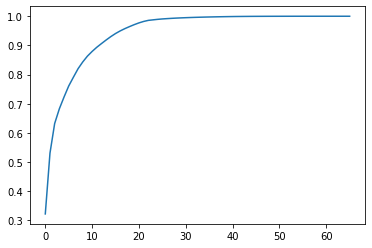

0: 0.3216370216483571
1: 0.5301582023518023
2: 0.6318349925187872
3: 0.6822893930017895
4: 0.7226976726705198
5: 0.7606008601150095
6: 0.7906952276858639
7: 0.8199933690735196
8: 0.8431728222874135
9: 0.8631760122577719
10: 0.8791868400280647
11: 0.8935649637443674
12: 0.9062346346605716
13: 0.9185555352522804
14: 0.9302003769153856
15: 0.9406947165547688
16: 0.9497055762851003
17: 0.9575414230906959
18: 0.964568734681985
19: 0.9712181846832639
20: 0.977185951914986
21: 0.9821196133660729
22: 0.9858117676111959
23: 0.987606271075795
24: 0.9893511534339743
25: 0.990737656736735
26: 0.9918202959135614
27: 0.9928044619900424
28: 0.9936720961186024
29: 0.9944049112899758
30: 0.9950623806247214
31: 0.995648083243
32: 0.9961826355962158
33: 0.9966409333070059
34: 0.9970775595866891
35: 0.997465375659109
36: 0.9978305080115318
37: 0.9981600595250598
38: 0.9984472996144571
39: 0.998713777574848
40: 0.998954237094315
41: 0.9991559806644595
42: 0.9993010516561333
43: 0.9994334168051834
44: 0.999

In [74]:
## starting with all dimensions
n_components = 66
pca = PCA(n_components=n_components)

pca.fit(df_scaled)

## looking at cumulative explained variance
cum_var_exp = pca.explained_variance_ratio_.cumsum()

plt.plot(cum_var_exp);
plt.show()

for n in range(n_components):
    print(f'{n}: {cum_var_exp[n]}')
    
## 12 pc explain 90%, 30 95%, 25 99%

### PCA explained var
12 pc explain: 90%   
30: 95%   
25: 99%  
41: 99.9%  